In [1]:
### Import libraries
# from kitti_data import pykitti
# from kitti_data.pykitti.tracklet import parseXML, TRUNC_IN_IMAGE, TRUNC_TRUNCATED
# from kitti_data.draw import *
# from kitti_data.io import *
import math
# from net.utility.draw import *
# from net.processing.boxes3d import *

import cv2
# import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
import glob

import keras
from keras.applications.imagenet_utils import preprocess_input
from keras.backend.tensorflow_backend import set_session
from keras.models import Model
from keras.preprocessing import image
import matplotlib.pyplot as plt
from random import shuffle
from scipy.misc import imread
from scipy.misc import imresize

from keras.models import Model
from keras.layers import Input, merge, Convolution2D, MaxPooling2D, UpSampling2D,Lambda
from keras.optimizers import Adam
# from keras.callbacks import ModelCheckpoint, LearningRateScheduler

# from ssd import SSD300
# from ssd_training import MultiboxLoss
# from ssd_utils import BBoxUtility

%matplotlib inline
plt.rcParams['figure.figsize']=(8,8)
plt.rcParams['image.interpolation']='nearest'
np.set_printoptions(suppress=True)


# from keras.models import Model
# from keras.layers import Input, merge, Convolution2D, MaxPooling2D, UpSampling2D,Lambda
# from keras.optimizers import Adam
# from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as K
from scipy.ndimage.measurements import label
# from keras.applications.imagenet_utils import preprocess_input
# from keras.back


# import time



Using TensorFlow backend.


In [2]:
# top_images=glob.glob('data/seg/top_image/*.png')
# rgb_images=glob.glob('data/seg/rgb/rgb_*.png')
# gt_boxes=glob.glob('data/seg/gt_boxes3d/gt_boxes3d_*.npy')
# gt_lab=glob.glob('data/seg/gt_labels/gt_labels_*.npy')
# gt_box3d=[]
# rgb_ims=[]
# top_ims=[]
# top_boxes=[]
# gt_labels=[]
# for i in range(len(gt_boxes)):
#     top_im=cv2.imread(top_images[i])
#     top_im=cv2.cvtColor(top_im, cv2.COLOR_BGR2RGB)
    
#     rgb_im=cv2.imread(rgb_images[i])
#     rgb_im=cv2.cvtColor(rgb_im,cv2.COLOR_BGR2RGB)
    
#     gt_box=np.load(gt_boxes[i])
#     top_box = box3d_to_top_box(gt_box)
    
#     gt_label=np.load(gt_lab[i])
#     gt_label=gt_label.astype(str)
#     gt_labels.append(gt_label)
    
#     gt_box3d.append(gt_box)
#     top_boxes.append(top_box)
#     top_ims.append(top_im)
#     rgb_ims.append(rgb_im)
    

In [3]:
# len(gt_labels[0])
# gt_labels[0]

In [4]:
# top_boxes=np.array(top_boxes)
# len(top_boxes[0])

**the preprocesss input!**

In [5]:

# p='/Users/simin/Desktop/data/IMG/center_2017_03_20_23_45_31_377.png'
# p='/Users/simin/Desktop/0000000009.jpg'
# /Users/simin/Desktop/didi-udacity-2017-master/data/seg/rgb/rgb_00168.png
# inputs = []
# images = []
# p1 = '/Users/simin/Desktop/didi-udacity-2017-master/data/seg/rgb/rgb_00113.png'
# img = image.load_img(p1, target_size=(300, 300))
# img = image.img_to_array(img)
# images.append(imread(p1))
# inputs.append(img.copy())
# p2 = '/Users/simin/Downloads/CarND-Vehicle-Detection-master/test_images/boys.jpg'
# img = image.load_img(p2, target_size=(300, 300))
# img = image.img_to_array(img)
# images.append(imread(p2))
# inputs.append(img.copy())

# print(len(images))

# inp = preprocess_input(np.array(inputs))
# plt.imshow(inp[0])
# print(np.max(inp))

In [6]:
# inputs=[]
# images=[]
# for i in range(9):
# #     top_im=cv2.imread(top_images[i])
# #     top_im=cv2.cvtColor(top_im, cv2.COLOR_BGR2RGB)
#     top_im = image.load_img(top_images[i+120], target_size=(300, 300))
#     top_im=image.img_to_array(top_im)
# #     rgb_im = image.load_img(rgb_images[i+200], target_size=(300, 300))
# #     rgb_im=image.img_to_array(rgb_im)
# #     rgb_im=rgb_im.astype(dtype=('float64'))
# #     rgb_im=rgb_im/127.5-1.

# #     images.append(imread(rgb_images[i]))
#     images.append(top_im)
#     inputs.append(top_im.copy())

# plt.imshow(images[0])
# # rgb_ims[0].shape
# inputs = preprocess_input(np.array(inputs))

# print(np.max(inputs))
# for k in range(3):
#     plt.imshow(inputs[i])

#     plt.show()

In [7]:
# plt.imshow(images[0])

In [8]:
# plt.imshow(rgb_ims[0])

In [9]:
# top_boxes = box3d_to_top_box(gt_box3d[0])
# top_boxes.shape

In [10]:

import pandas as pd

df_files1=pd.read_csv('test1.csv', header=0)

# df_vehicles=df_files[(df_files['Label']=='Car')|(df_files['Label']=='Truck')|(df_files['Label']=='Pedestrian')\
#                   |(df_files['Label']=='Cyclist')|(df_files['Label']=='Van')].reset_index()
df_vehicles1=df_files1[(df_files1['Label']=='Car')|(df_files1['Label']=='Truck')|(df_files1['Label']=='Van')].reset_index()
df_vehicles1=df_vehicles1.drop('index',1)

# df_vehicles['File_Path']='top_image'+'/'+df_vehicles['Frame']

df_vehicles1.head()

,File_Path,Frame,Label,xmin,xmax,ymin,ymax
0,/Users/simin/Desktop/didi-udacity-2017-master/...,top_image_00000.png,Car,76.0,91.0,167.0,200.0
1,/Users/simin/Desktop/didi-udacity-2017-master/...,top_image_00000.png,Car,79.0,98.0,117.0,160.0
2,/Users/simin/Desktop/didi-udacity-2017-master/...,top_image_00000.png,Car,85.0,103.0,70.0,107.0
3,/Users/simin/Desktop/didi-udacity-2017-master/...,top_image_00001.png,Car,75.0,90.0,180.0,213.0
4,/Users/simin/Desktop/didi-udacity-2017-master/...,top_image_00001.png,Car,79.0,97.0,129.0,173.0


In [11]:
df_vehicles1.tail()

,File_Path,Frame,Label,xmin,xmax,ymin,ymax
1216,/Users/simin/Desktop/didi-udacity-2017-master/...,top_image_00232.png,Car,419.0,468.0,60.0,86.0
1217,/Users/simin/Desktop/didi-udacity-2017-master/...,top_image_00232.png,Car,212.0,233.0,-185.0,-143.0
1218,/Users/simin/Desktop/didi-udacity-2017-master/...,top_image_00232.png,Car,175.0,198.0,-192.0,-153.0
1219,/Users/simin/Desktop/didi-udacity-2017-master/...,top_image_00232.png,Car,222.0,241.0,-244.0,-208.0
1220,/Users/simin/Desktop/didi-udacity-2017-master/...,top_image_00232.png,Car,184.0,206.0,-252.0,-212.0


In [12]:
df_files2=pd.read_csv('test2.csv', header=0)
df_vehicles2=df_files2[(df_files2['Label']=='Car')|(df_files2['Label']=='Van')].reset_index()
df_vehicles2=df_vehicles2.drop('index',1)



In [13]:
df_vehicles2.head()

,File_Path,Frame,Label,xmin,xmax,ymin,ymax
0,/Users/simin/Desktop/didi-udacity-2017-master/...,top_image2_00000.png,Car,192.0,220.0,221.0,260.0
1,/Users/simin/Desktop/didi-udacity-2017-master/...,top_image2_00000.png,Car,125.0,141.0,99.0,136.0
2,/Users/simin/Desktop/didi-udacity-2017-master/...,top_image2_00000.png,Car,184.0,202.0,-103.0,-62.0
3,/Users/simin/Desktop/didi-udacity-2017-master/...,top_image2_00000.png,Van,109.0,131.0,-275.0,-209.0
4,/Users/simin/Desktop/didi-udacity-2017-master/...,top_image2_00000.png,Car,329.0,372.0,217.0,258.0


In [14]:
df_files3=pd.read_csv('test3.csv', header=0)
df_vehicles3=df_files3[(df_files3['Label']=='Car')|(df_files3['Label']=='Van')|(df_files3['Label']=='Truck')].reset_index()
df_vehicles3=df_vehicles3.drop('index',1)

In [15]:
df_vehicles3.tail()

,File_Path,Frame,Label,xmin,xmax,ymin,ymax
2260,/Users/simin/Desktop/didi-udacity-2017-master/...,top_image3_00356.png,Car,239.0,256.0,156.0,190.0
2261,/Users/simin/Desktop/didi-udacity-2017-master/...,top_image3_00357.png,Car,239.0,256.0,155.0,188.0
2262,/Users/simin/Desktop/didi-udacity-2017-master/...,top_image3_00358.png,Car,239.0,256.0,153.0,186.0
2263,/Users/simin/Desktop/didi-udacity-2017-master/...,top_image3_00359.png,Car,239.0,256.0,151.0,184.0
2264,/Users/simin/Desktop/didi-udacity-2017-master/...,top_image3_00360.png,Car,240.0,256.0,149.0,183.0


In [16]:
df_files4=pd.read_csv('test4.csv', header=0)
df_vehicles4=df_files4[(df_files4['Label']=='Car')|(df_files4['Label']=='Van')].reset_index()
df_vehicles4=df_vehicles4.drop('index',1)
df_vehicles4.head()

,File_Path,Frame,Label,xmin,xmax,ymin,ymax
0,/Users/simin/Desktop/didi-udacity-2017-master/...,top_image4_00000.png,Car,242.0,258.0,227.0,264.0
1,/Users/simin/Desktop/didi-udacity-2017-master/...,top_image4_00000.png,Car,275.0,317.0,333.0,373.0
2,/Users/simin/Desktop/didi-udacity-2017-master/...,top_image4_00000.png,Car,278.0,314.0,300.0,336.0
3,/Users/simin/Desktop/didi-udacity-2017-master/...,top_image4_00000.png,Car,275.0,314.0,262.0,301.0
4,/Users/simin/Desktop/didi-udacity-2017-master/...,top_image4_00000.png,Car,272.0,314.0,227.0,267.0


In [17]:
# df_vehicles=pd.concat([df_vehicles1,df_vehicles2,df_vehicles3]).reset_index()
# df_vehicles=df_vehicles.drop('index',1)
# df_vehicles.columns=['File_Path','Frame','Label','xmin','xmax','ymin','ymax']
# df_vehicles['Frame'][3002]
df_vehicles=pd.concat([df_vehicles1,df_vehicles2,df_vehicles3, df_vehicles4]).reset_index()
df_vehicles=df_vehicles.drop('index',1)
df_vehicles.columns=['File_Path','Frame','Label','xmin','xmax','ymin','ymax']
a=df_vehicles[df_vehicles['xmin']>=0]
b=a[a['xmax']<=500]
c=b[b['ymin']>=0]
e=c[c['ymax']<=400]
df_vehicles=e.reset_index()

In [18]:
df_vehicles.tail()

,index,File_Path,Frame,Label,xmin,xmax,ymin,ymax
5503,9690,/Users/simin/Desktop/didi-udacity-2017-master/...,top_image4_00368.png,Car,309.0,331.0,55.0,94.0
5504,9691,/Users/simin/Desktop/didi-udacity-2017-master/...,top_image4_00369.png,Car,310.0,331.0,48.0,87.0
5505,9692,/Users/simin/Desktop/didi-udacity-2017-master/...,top_image4_00370.png,Car,310.0,332.0,42.0,81.0
5506,9693,/Users/simin/Desktop/didi-udacity-2017-master/...,top_image4_00371.png,Car,311.0,332.0,36.0,75.0
5507,9694,/Users/simin/Desktop/didi-udacity-2017-master/...,top_image4_00372.png,Car,312.0,333.0,30.0,68.0


In [19]:
len(df_vehicles)

5508

In [20]:


def trans_image(image,bb_boxes_f,trans_range):
    # Translation augmentation
    bb_boxes_f = bb_boxes_f.copy(deep=True)

    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2

    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])
    rows,cols,channels = image.shape
    bb_boxes_f['xmin'] = bb_boxes_f['xmin']+tr_x
    bb_boxes_f['xmax'] = bb_boxes_f['xmax']+tr_x
    bb_boxes_f['ymin'] = bb_boxes_f['ymin']+tr_y
    bb_boxes_f['ymax'] = bb_boxes_f['ymax']+tr_y
    
    image_tr = cv2.warpAffine(image,Trans_M,(cols,rows))
    
    return image_tr,bb_boxes_f



def stretch_image(img,bb_boxes_f,scale_range):
    # Stretching augmentation 
    
    bb_boxes_f = bb_boxes_f.copy(deep=True)
    
    tr_x1 = scale_range*np.random.uniform()
    tr_y1 = scale_range*np.random.uniform()
    p1 = (tr_x1,tr_y1)
    tr_x2 = scale_range*np.random.uniform()
    tr_y2 = scale_range*np.random.uniform()
    p2 = (img.shape[1]-tr_x2,tr_y1)

    p3 = (img.shape[1]-tr_x2,img.shape[0]-tr_y2)
    p4 = (tr_x1,img.shape[0]-tr_y2)

    pts1 = np.float32([[p1[0],p1[1]],
                   [p2[0],p2[1]],
                   [p3[0],p3[1]],
                   [p4[0],p4[1]]])
    pts2 = np.float32([[0,0],
                   [img.shape[1],0],
                   [img.shape[1],img.shape[0]],
                   [0,img.shape[0]] ]
                   )

    M = cv2.getPerspectiveTransform(pts1,pts2)
    img = cv2.warpPerspective(img,M,(img.shape[1],img.shape[0]))
    img = np.array(img,dtype=np.uint8)
    
    bb_boxes_f['xmin'] = (bb_boxes_f['xmin'] - p1[0])/(p2[0]-p1[0])*img.shape[1]
    bb_boxes_f['xmax'] = (bb_boxes_f['xmax'] - p1[0])/(p2[0]-p1[0])*img.shape[1]
    bb_boxes_f['ymin'] = (bb_boxes_f['ymin'] - p1[1])/(p3[1]-p1[1])*img.shape[0]
    bb_boxes_f['ymax'] = (bb_boxes_f['ymax'] - p1[1])/(p3[1]-p1[1])*img.shape[0]
    
    return img,bb_boxes_f



### Augmentation functions 

def augment_brightness_camera_images(image):
    
    ### Augment brightness
    
    image1=cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
    random_bright=.5+np.random.uniform()
    image1[:,:,0]=image1[:,:,0]*random_bright
    image1=cv2.cvtColor(image1, cv2.COLOR_YUV2RGB)
    
    return image1

saturation_var=0.5
brightness_var=0.5
contrast_var=0.5
lighting_std=0.5
hflip_prob=0.5
vflip_prob=0.5


def grayscale(rgb):
    return rgb.dot([0.299, 0.587, 0.114])

def saturation(rgb):
    gs = grayscale(rgb)
    alpha = 2 * np.random.random() * saturation_var 
    alpha += 1 - saturation_var
    rgb = rgb * alpha + (1 - alpha) * gs[:, :, None]
    return np.clip(rgb, 0, 255)

def brightness(rgb):
#     rgb=cv2.cvtColor(rgb, cv2.COLOR_RGB2YUV)
#     random_bright=1.5+np.random.uniform()
#     rgb[:,:,0]=rgb[:,:,0]*random_bright
#     rgb=cv2.cvtColor(rgb, cv2.COLOR_YUV2RGB)
    alpha = 2 * np.random.random() * brightness_var 
    alpha += 1 - saturation_var
    rgb = rgb * alpha
    return rgb
def contrast( rgb):
    gs = grayscale(rgb).mean() * np.ones_like(rgb)
    alpha = 2 * np.random.random() * contrast_var 
    alpha += 1 - contrast_var
    rgb = rgb * alpha + (1 - alpha) * gs
    return np.clip(rgb, 0, 255)



In [21]:
# im=cv2.imread(df_vehicles['File_Path'][0])
# im=cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

# imm=augment_brightness_camera_images(im)
# plt.imshow(imm)

In [22]:
def rotate_image(image, bb_boxes_f):
     
    
    bb_boxes_ = bb_boxes_f.copy(deep=True)
    
    num=np.random.randint(5)
    angle=90*num
    print(angle)
    h,w,ch=image.shape

    
    
    M=cv2.getRotationMatrix2D((w//2,h//2),angle,1)
    cos1=np.abs(M[0,0])
    sin1=np.abs(M[0,1])
    cos=np.cos(angle*np.pi/180)
    sin=np.sin(angle*np.pi/180)
    nw=int((h*sin1)+(w*cos1))
    nh=int((h*cos1)+(w*sin1))
   
    M[0,2]+=(nw/2)-w//2
    M[1,2]+=(nh/2)-h//2
    
#     cw=np.abs((nw/2)-w/2)
#     ch=np.abs((nh/2)-h/2)

    rot_im=cv2.warpAffine(image,M,(nw,nh))
    
    #plt.plot(w/2,h/2,'bs')
    
    crx=(rot_im.shape[1]//2)
    cry=(rot_im.shape[0]//2)
    delta_x=int((crx-w//2))*sin
    delta_y=int((cry-h//2))*sin
    
    bb_boxes_['xmin'] = np.rint((bb_boxes_f['xmin']-crx)*cos + (bb_boxes_f['ymin']-cry)*sin + crx)+delta_y
    bb_boxes_['ymin'] = np.rint(cry - (bb_boxes_f['xmin']-crx)*sin + (bb_boxes_f['ymin']-cry)*cos)-delta_x
    bb_boxes_['xmax'] = np.rint((bb_boxes_f['xmax']-crx)*cos + (bb_boxes_f['ymax']-cry)*sin + crx)+delta_y
    bb_boxes_['ymax'] = np.rint(cry - (bb_boxes_f['xmax']-crx)*sin + (bb_boxes_f['ymax']-cry)*cos)-delta_x
    
    #print('sin',str(sin))
#     print('cos', str(cos))
    #print(delta_x, delta_y)
    #print('nw',str(nw), 'nh',str(nh))
    #plt.plot(rot_im.shape[1]/2,rot_im.shape[0]/2,'rs')
    return rot_im, bb_boxes_

In [23]:
# def plot_bbox1(bb_boxes,ind_bb,color='r',linewidth=2):
#     ### Plot bounding box
    
#     bb_box_i = [bb_boxes.iloc[ind_bb][0],
#                 bb_boxes.iloc[ind_bb][1],
#                 bb_boxes.iloc[ind_bb][2],
#                 bb_boxes.iloc[ind_bb][3]]
#     plt.plot([bb_box_i[0],bb_box_i[2],bb_box_i[2],
#                   bb_box_i[0],bb_box_i[0]],
#              [bb_box_i[1],bb_box_i[1],bb_box_i[3],
#                   bb_box_i[3],bb_box_i[1]],
#              color,linewidth=linewidth)
    
    
# def plot_im_bbox1(im,bb_boxes):
#     ### Plot image and bounding box
#     plt.imshow(im)
#     for i in range(len(bb_boxes)):
#         plot_bbox1(bb_boxes,i,'g')
    
#         bb_box_i = [bb_boxes.iloc[i][0],bb_boxes.iloc[i][1],
#                 bb_boxes.iloc[i][2],bb_boxes.iloc[i][3]]
#         plt.plot(bb_box_i[0],bb_box_i[1],'rs')
#         plt.plot(bb_box_i[2],bb_box_i[3],'bs')
# #         print('bb_i',str(bb_box_i[0]),str(bb_box_i[1]))
#     plt.axis('off')
    
    
def plot_bbox1(bb_boxes,ind_bb,color='r',linewidth=2):
    ### Plot bounding box
    
    bb_box_i = [bb_boxes.iloc[ind_bb]['xmin'],
                bb_boxes.iloc[ind_bb]['ymin'],
                bb_boxes.iloc[ind_bb]['xmax'],
                bb_boxes.iloc[ind_bb]['ymax']]
    plt.plot([bb_box_i[0],bb_box_i[2],bb_box_i[2],
                  bb_box_i[0],bb_box_i[0]],
             [bb_box_i[1],bb_box_i[1],bb_box_i[3],
                  bb_box_i[3],bb_box_i[1]],
             color,linewidth=linewidth)
    
def plot_im_bbox1(im,bb_boxes):
    ### Plot image and bounding box
    plt.imshow(im)
    for i in range(len(bb_boxes)):
        plot_bbox1(bb_boxes,i,'g')
    
        bb_box_i = [bb_boxes.iloc[i]['xmin'],bb_boxes.iloc[i]['ymin'],
                bb_boxes.iloc[i]['xmax'],bb_boxes.iloc[i]['ymax']]
        plt.plot(bb_box_i[0],bb_box_i[1],'rs')
        plt.plot(bb_box_i[2],bb_box_i[3],'bs')
    plt.axis('off');
    


In [24]:
df=df_vehicles['File_Path'][5400][46:]
im=cv2.imread(df)
name_str = df.split('/')
name_str = name_str[-1]

# #print(file_name)
# bb_boxes = df_vehicles[df_vehicles['Frame'] == name_str].reset_index()
# # plot_im_bbox1(im,bb_boxes)
# # imm,bbb=trans_image(im,bb_boxes,trans_range=50)
# #imm,bbb=stretch_image(im,bb_boxes,50)

# # plot_im_bbox(imm, bbb)
# ro,bb=rotate_image(im, bb_boxes )
# plot_im_bbox1(ro,bb)
# # print(bb_boxes)

# # ro.shape
# # plt.imshow(imm)

# 

In [25]:
# def plot_bbox2(bb_boxes,ind_bb, color, linewidth):
#     ### Plot bounding box
    
#     bb_box_i = [bb_boxes.iloc[ind_bb][0],
#                 bb_boxes.iloc[ind_bb][1],
#                 bb_boxes.iloc[ind_bb][2],
#                 bb_boxes.iloc[ind_bb][3]]
#     plt.plot([bb_box_i[0],bb_box_i[2],bb_box_i[2],
#                   bb_box_i[0],bb_box_i[0]
#                   ],
#              [bb_box_i[1],bb_box_i[1],bb_box_i[3],
#                   bb_box_i[3],bb_box_i[1]],
#              color,linewidth=linewidth)
    
    
    
# #     plt.plot([bb_box_i[0]-5,bb_box_i[2]-5,bb_box_i[2]+5,
# #                   bb_box_i[0],bb_box_i[0]-10
# #                   ],
# #              [bb_box_i[1],bb_box_i[1]-10,bb_box_i[3],
# #                   bb_box_i[3]+10,bb_box_i[1]],
# #              color,linewidth=linewidth)
    
# def plot_im_bbox2(im,bb_boxes):
#     ### Plot image and bounding box
#     plt.imshow(im)
#     for i in range(len(bb_boxes)):
# #         cx=crx[i]
# #         cy=cry[i]
#         plot_bbox2(bb_boxes,i, 'g',2)
    
#         bb_box_i = [bb_boxes.iloc[i][0],bb_boxes.iloc[i][1],
#                 bb_boxes.iloc[i][2],bb_boxes.iloc[i][3]]
# #         plt.plot(bb_box_i[0],bb_box_i[1],'rs')
# #         plt.plot(bb_box_i[2],bb_box_i[3],'bs')

In [26]:


    
    
# ind=np.random.randint(200)
file_name = df_vehicles['File_Path'][5490][46:]
img=cv2.imread(file_name)
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
name_str = file_name.split('/')
name_str = name_str[-1]
mi=augment_brightness_camera_images(img)

bb_boxes = df_vehicles[df_vehicles['Frame'] == name_str].reset_index()
# top, bbox=trans_image(mi,bb_boxes,trans_range=5)
# plt.figure(figsize=(8,8))
top, bbox=stretch_image(mi,bb_boxes,scale_range=10)



# rr,bb=rotate_image(mi, bb_boxes)
# plot_im_bbox2(rr,bb)

# 

In [27]:
def get_image_name(df,ind,size=(500,400),augmentation = False,trans_range = 20,scale_range=20):
    ### Get image by name
    
    file_name = df['File_Path'][ind][46:]
    img = imread(file_name).astype('float32')
    #img = cv2.imread(file_name)
    img_size = np.shape(img)
    
#     img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    im = cv2.resize(img,size)
#     im=imresize(img, size).astype('float32')
    name_str = file_name.split('/')
    name_str = name_str[-1]
    
    #print(file_name)
    bb_boxes = df[df['Frame'] == name_str].reset_index()
    img_size_post = np.shape(im)
    
    random=np.random.randint(2)
    if augmentation == True:
                
        im=saturation(im)
        im=brightness(im)
        im=contrast(im)
        
        if(random==0):
            im,bb_boxes = trans_image(im,bb_boxes,trans_range)
        elif(random==1):
            im,bb_boxes = stretch_image(im,bb_boxes,scale_range)

#         im = augment_brightness_camera_images(im)
        
    bb_boxes['xmin'] = np.rint(bb_boxes['xmin']/img_size[1]*img_size_post[1])
    bb_boxes['xmax'] = np.rint(bb_boxes['xmax']/img_size[1]*img_size_post[1])
    bb_boxes['ymin'] = np.rint(bb_boxes['ymin']/img_size[0]*img_size_post[0])
    bb_boxes['ymax'] = np.rint(bb_boxes['ymax']/img_size[0]*img_size_post[0])
    bb_boxes['Area'] = (bb_boxes['xmax']- bb_boxes['xmin'])*(bb_boxes['ymax']- bb_boxes['ymin']) 
    #bb_boxes = bb_boxes[bb_boxes['Area']>400]
        
    
    return name_str,im,bb_boxes


def get_mask_seg(img,bb_boxes_f):
    
    #### Get mask 
    
    img_mask = np.zeros_like(img[:,:,0])
    for i in range(len(bb_boxes_f)):
        #plot_bbox(bb_boxes,i,'g')
        bb_box_i = [bb_boxes_f.iloc[i]['xmin'],bb_boxes_f.iloc[i]['ymin'],
                bb_boxes_f.iloc[i]['xmax'],bb_boxes_f.iloc[i]['ymax']]
        bb_box_i=np.array(bb_box_i).astype('uint16')
        img_mask[bb_box_i[1]:bb_box_i[3],bb_box_i[0]:bb_box_i[2]]=1.
        #print(bb_box_i[1],bb_box_i[3],bb_box_i[0],bb_box_i[2])
        img_mask = np.reshape(img_mask,(np.shape(img_mask)[0],np.shape(img_mask)[1],1))
    return img_mask

In [28]:
def plot_im_mask(im,im_mask):
    ### Function to plot image mask 
    
    im = np.array(im,dtype=np.uint8)
    im_mask = np.array(im_mask,dtype=np.uint8)
    plt.subplot(1,3,1)
    plt.imshow(im)
    plt.axis('off')
    plt.subplot(1,3,2)
    plt.imshow(im_mask[:,:,0])
    plt.axis('off')
    plt.subplot(1,3,3)
    plt.imshow(cv2.bitwise_and(im,im,mask=im_mask));
    plt.axis('off')
    plt.show();
    
def plot_bbox(bb_boxes,ind_bb,color='r',linewidth=2):
    ### Plot bounding box
    
    bb_box_i = [bb_boxes.iloc[ind_bb]['xmin'],
                bb_boxes.iloc[ind_bb]['ymin'],
                bb_boxes.iloc[ind_bb]['xmax'],
                bb_boxes.iloc[ind_bb]['ymax']]
    plt.plot([bb_box_i[0],bb_box_i[2],bb_box_i[2],
                  bb_box_i[0],bb_box_i[0]],
             [bb_box_i[1],bb_box_i[1],bb_box_i[3],
                  bb_box_i[3],bb_box_i[1]],
             color,linewidth=linewidth)
    
def plot_im_bbox(im,bb_boxes):
    ### Plot image and bounding box
    plt.imshow(im)
    for i in range(len(bb_boxes)):
        plot_bbox(bb_boxes,i,'g')
    
        bb_box_i = [bb_boxes.iloc[i]['xmin'],bb_boxes.iloc[i]['ymin'],
                bb_boxes.iloc[i]['xmax'],bb_boxes.iloc[i]['ymax']]
        plt.plot(bb_box_i[0],bb_box_i[1],'rs')
        plt.plot(bb_box_i[2],bb_box_i[3],'bs')
    plt.axis('off');


In [29]:
name_str,img,bb_boxes = get_image_name(df_vehicles,1,augmentation=False,trans_range=0,scale_range=0)

print(bb_boxes)

   level_0  index                                          File_Path  \
0        0      0  /Users/simin/Desktop/didi-udacity-2017-master/...   
1        1      1  /Users/simin/Desktop/didi-udacity-2017-master/...   
2        2      2  /Users/simin/Desktop/didi-udacity-2017-master/...   

                 Frame Label  xmin   xmax   ymin   ymax   Area  
0  top_image_00000.png   Car  76.0   91.0  167.0  200.0  495.0  
1  top_image_00000.png   Car  79.0   98.0  117.0  160.0  817.0  
2  top_image_00000.png   Car  85.0  103.0   70.0  107.0  666.0  


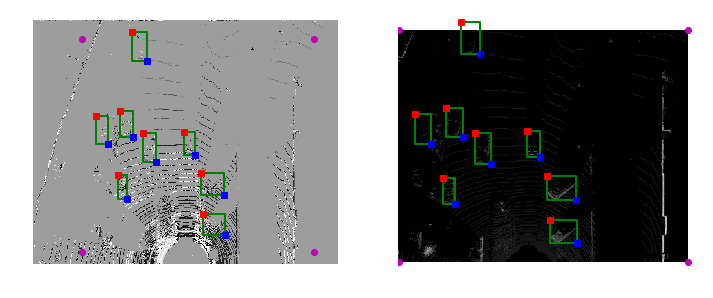

In [30]:
#### Test translation and stretching augmentations

name_str,img,bb_boxes = get_image_name(df_vehicles,5300,augmentation=True,trans_range=0,scale_range=0)
#img_mask =get_mask_seg(img,bb_boxes)

tr_x1 = 80
tr_y1 = 30
tr_x2 = 40
tr_y2 = 20



p1 = (tr_x1,tr_y1)
p2 = (img.shape[1]-tr_x2,tr_y1)

p3 = (img.shape[1]-tr_x2,img.shape[0]-tr_y2)
p4 = (tr_x1,img.shape[0]-tr_y2)

pts1 = np.float32([[p1[0],p1[1]],
                   [p2[0],p2[1]],
                   [p3[0],p3[1]],
                   [p4[0],p4[1]]])
pts2 = np.float32([[0,0],
                   [img.shape[1],0],
                   [img.shape[1],img.shape[0]],[0,img.shape[0]] ]
                   )

M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img,M,(img.shape[1],img.shape[0]))
dst = np.array(dst,dtype=np.uint8)


plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(img)
plt.plot(p1[0],p1[1],'mo')
plt.plot(p2[0],p2[1],'mo')
plt.plot(p3[0],p3[1],'mo')
plt.plot(p4[0],p4[1],'mo')
for i in range(len(bb_boxes)):
    plot_bbox(bb_boxes,i,'g')
    
    bb_box_i = [bb_boxes.iloc[i]['xmin'],bb_boxes.iloc[i]['ymin'],
                bb_boxes.iloc[i]['xmax'],bb_boxes.iloc[i]['ymax']]
    plt.plot(bb_box_i[0],bb_box_i[1],'rs')
    plt.plot(bb_box_i[2],bb_box_i[3],'bs')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(dst)
bb_boxes1 = bb_boxes.copy(deep=True)
bb_boxes1['xmin'] = (bb_boxes['xmin'] - p1[0])/(p2[0]-p1[0])*img.shape[1]
bb_boxes1['xmax'] = (bb_boxes['xmax'] - p1[0])/(p2[0]-p1[0])*img.shape[1]
bb_boxes1['ymin'] = (bb_boxes['ymin'] - p1[1])/(p3[1]-p1[1])*img.shape[0]
bb_boxes1['ymax'] = (bb_boxes['ymax'] - p1[1])/(p3[1]-p1[1])*img.shape[0]
plt.plot(0,0,'mo')
plt.plot(img.shape[1],0,'mo')
plt.plot(img.shape[1],img.shape[0],'mo')
plt.plot(0,img.shape[0],'mo')
plot_im_bbox(dst,bb_boxes1)

plt.axis('off');


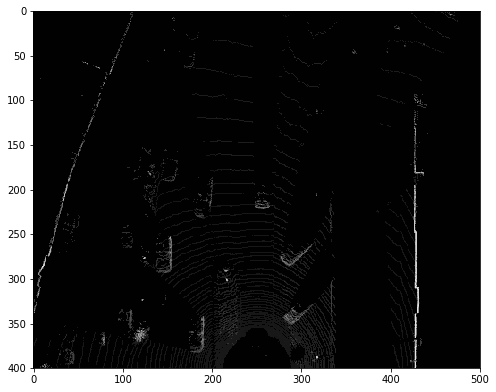

In [31]:
img=img.astype('uint8')
plt.imshow(img)

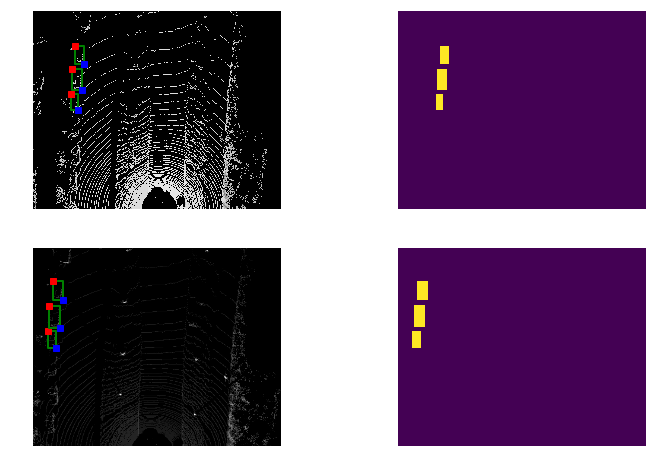

In [32]:
#### Test translation and stretching augmentations

name_str,img,bb_boxes = get_image_name(df_vehicles,0,augmentation=False)
img_mask =get_mask_seg(img,bb_boxes)

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plot_im_bbox(img,bb_boxes)

plt.subplot(2,2,2)
plt.imshow(img_mask[:,:,0])
plt.axis('off')

plt.subplot(2,2,3)
bb_boxes1 = bb_boxes.copy(deep=True)
dst,bb_boxes1 = stretch_image(img,bb_boxes1,80)

plt.imshow(dst)

plot_im_bbox(dst,bb_boxes1)

plt.subplot(2,2,4)
img_mask2 =get_mask_seg(dst,bb_boxes1)
plt.imshow(img_mask2[:,:,0])
plt.axis('off');

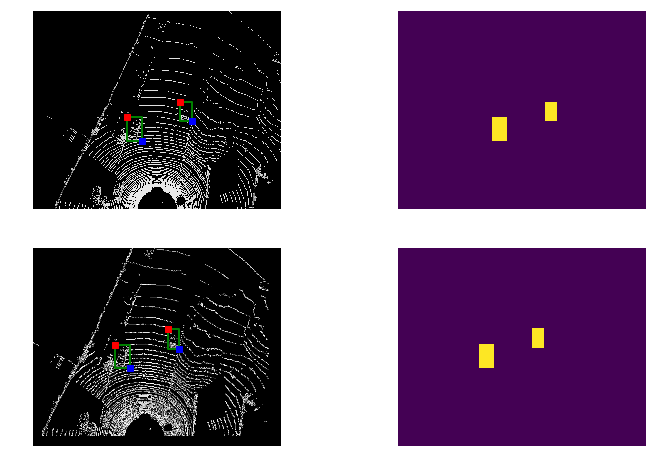

In [33]:
#### Test translation and stretching augmentations

name_str,img,bb_boxes = get_image_name(df_vehicles,5450,augmentation=False)
img_mask =get_mask_seg(img,bb_boxes)

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plot_im_bbox(img,bb_boxes)

plt.subplot(2,2,2)
plt.imshow(img_mask[:,:,0])
plt.axis('off')

plt.subplot(2,2,3)
bb_boxes = bb_boxes.copy(deep=True)
img_trans,bb_boxes1 = trans_image(img,bb_boxes,100)

plt.imshow(img_trans)

plot_im_bbox(img_trans,bb_boxes1)
img_mask2 =get_mask_seg(img_trans,bb_boxes1)

plt.subplot(2,2,4)
plt.imshow(img_mask2[:,:,0])
plt.axis('off');

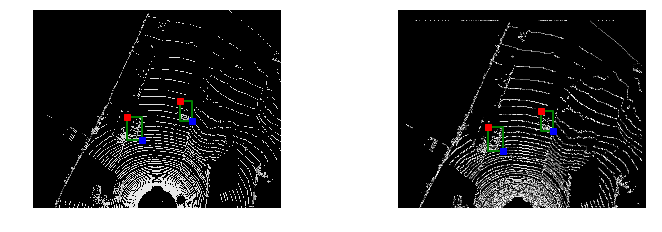

In [34]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plot_im_bbox(img,bb_boxes)
plt.subplot(2,2,2)
#bb_boxes1 = bb_boxes.copy()
img_trans,bb_boxes1 = trans_image(img,bb_boxes,50)
plt.imshow(img_trans)
plot_im_bbox(img_trans,bb_boxes1)


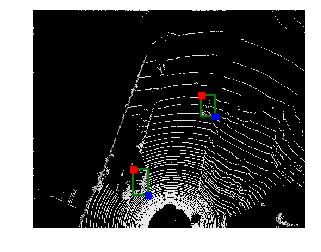

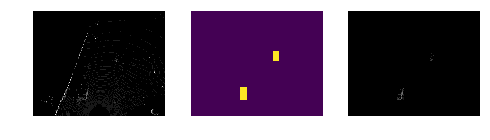

In [35]:
#### Put all the augmentations in 1 function with a flag for augmentation


name_str,img,bb_boxes = get_image_name(df_vehicles,5475,augmentation=False)
img_mask =get_mask_seg(img,bb_boxes)


plt.figure(figsize=(6,4))
plt.imshow(img)
plot_im_bbox(img,bb_boxes)
plt.show()

plot_im_mask(img,img_mask)

In [36]:
#### Training generator, generates augmented images
def generate_train_batch(data,batch_size = 32):
    
    batch_images = np.zeros((batch_size, img_rows, img_cols, 3))
    batch_masks = np.zeros((batch_size, img_rows, img_cols, 1))
    while 1:
        for i_batch in range(batch_size):
            i_line = np.random.randint(len(data)-100)
            i_line = np.random.randint(len(data))
            name_str,img,bb_boxes = get_image_name(df_vehicles,i_line,
                                                   size=(img_cols, img_rows),
                                                  augmentation=True,
                                                   trans_range=50,
                                                   scale_range=50
                                                  )
            img_mask = get_mask_seg(img,bb_boxes)
            batch_images[i_batch] = img
            batch_masks[i_batch] =img_mask
        yield batch_images, batch_masks
        
#### Testing generator, generates augmented images
def generate_test_batch(data,batch_size = 32):
    batch_images = np.zeros((batch_size, img_rows, img_cols, 3))
    batch_masks = np.zeros((batch_size, img_rows, img_cols, 1))
    while 1:
        for i_batch in range(batch_size):
            i_line = np.random.randint(100)
            i_line = i_line+len(data)-100
            name_str,img,bb_boxes = get_image_name(df_vehicles,i_line,
                                                   size=(img_cols, img_rows),
                                                  augmentation=False,
                                                   trans_range=0,
                                                   scale_range=0
                                                  )
            img_mask = get_mask_seg(img,bb_boxes)
            batch_images[i_batch] = img
            batch_masks[i_batch] =img_mask
        yield batch_images, batch_masks

In [37]:
# def generate_test_batch(data,batch_size = 32):
#     batch_images = np.zeros((batch_size, img_rows, img_cols, 3))
#     batch_masks = np.zeros((batch_size, img_rows, img_cols, 1))
#     while 1:
#         for i_batch in range(batch_size):
#             i_line = np.random.randint(100)
#             name_str,img,bb_boxes = get_image_name(test_objs,i_line,
#                                                    size=(img_cols, img_rows),
#                                                   augmentation=False,
#                                                    trans_range=0,
#                                                    scale_range=0
#                                                   )
#             img_mask = get_mask_seg(img,bb_boxes)
#             batch_images[i_batch] = img
#             batch_masks[i_batch] =img_mask
#         yield batch_images, batch_masks

In [38]:
# strr,immm,bb=get_image_name(test_objs,100,size=(640,450),augmentation = False,trans_range = 0,scale_range=0)



In [39]:
# img_rows = 400
# img_cols = 640
# testing=generate_test_batch(test_objs,batch_size = 32)
# batch_img,batch_mask = next(testing)
# for i in range(1):
#     im = np.array(batch_img[i],dtype=np.uint8)
#     im_mask = np.array(batch_mask[i],dtype=np.uint8)
#     plt.subplot(1,3,1)
#     plt.imshow(im)
#     plt.axis('off')
#     plt.subplot(1,3,2)
#     plt.imshow(im_mask[:,:,0])
#     plt.axis('off')
#     plt.subplot(1,3,3)
#     plt.imshow(cv2.bitwise_and(im,im,mask=im_mask));
#     plt.axis('off')
#     plt.show();

In [40]:
##### Image size, 
img_rows = 320
img_cols = 480
# img_rows = 640
# img_cols = 960

In [41]:
#### Testing the generator


training_gen = generate_train_batch(df_vehicles,1)

In [42]:
batch_img,batch_mask = next(training_gen)
len(batch_img)

1

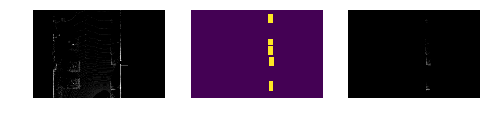

In [43]:
### Plotting generator output
for i in range(1):
    im = np.array(batch_img[i],dtype=np.uint8)
    im_mask = np.array(batch_mask[i],dtype=np.uint8)
    plt.subplot(1,3,1)
    plt.imshow(im)
    plt.axis('off')
    plt.subplot(1,3,2)
    plt.imshow(im_mask[:,:,0])
    plt.axis('off')
    plt.subplot(1,3,3)
    plt.imshow(cv2.bitwise_and(im,im,mask=im_mask));
    plt.axis('off')
    plt.show();

In [44]:
len(df_vehicles)

5508

In [45]:
### IOU or dice coeff calculation

def IOU_calc(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    
    return 2*(intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)


def IOU_calc_loss(y_true, y_pred):
    return -IOU_calc(y_true, y_pred)

In [46]:
### Defining a small Unet
### Smaller Unet defined so it fits in memory

def get_small_unet():
    inputs = Input((img_rows, img_cols,3))
    inputs_norm = Lambda(lambda x: x/127.5-1.)
    conv1 = Convolution2D(8, 3, 3, activation='relu', border_mode='same')(inputs)
    conv1 = Convolution2D(8, 3, 3, activation='relu', border_mode='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Convolution2D(16, 3, 3, activation='relu', border_mode='same')(pool1)
    conv2 = Convolution2D(16, 3, 3, activation='relu', border_mode='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Convolution2D(32, 3, 3, activation='relu', border_mode='same')(pool2)
    conv3 = Convolution2D(32, 3, 3, activation='relu', border_mode='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Convolution2D(64, 3, 3, activation='relu', border_mode='same')(pool3)
    conv4 = Convolution2D(64, 3, 3, activation='relu', border_mode='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Convolution2D(128, 3, 3, activation='relu', border_mode='same')(pool4)
    conv5 = Convolution2D(128, 3, 3, activation='relu', border_mode='same')(conv5)

    up6 = merge([UpSampling2D(size=(2, 2))(conv5), conv4], mode='concat', concat_axis=3)
    conv6 = Convolution2D(64, 3, 3, activation='relu', border_mode='same')(up6)
    conv6 = Convolution2D(64, 3, 3, activation='relu', border_mode='same')(conv6)

    up7 = merge([UpSampling2D(size=(2, 2))(conv6), conv3], mode='concat', concat_axis=3)
    conv7 = Convolution2D(32, 3, 3, activation='relu', border_mode='same')(up7)
    conv7 = Convolution2D(32, 3, 3, activation='relu', border_mode='same')(conv7)

    up8 = merge([UpSampling2D(size=(2, 2))(conv7), conv2], mode='concat', concat_axis=3)
    conv8 = Convolution2D(16, 3, 3, activation='relu', border_mode='same')(up8)
    conv8 = Convolution2D(16, 3, 3, activation='relu', border_mode='same')(conv8)

    up9 = merge([UpSampling2D(size=(2, 2))(conv8), conv1], mode='concat', concat_axis=3)
    conv9 = Convolution2D(8, 3, 3, activation='relu', border_mode='same')(up9)
    conv9 = Convolution2D(8, 3, 3, activation='relu', border_mode='same')(conv9)

    conv10 = Convolution2D(1, 1, 1, activation='sigmoid')(conv9)

    model = Model(input=inputs, output=conv10)

    
    return model

In [47]:
# ### Generator 

train_gen=generate_train_batch(df_vehicles, 1)
smooth = 1.
model = get_small_unet()
model.compile(optimizer=Adam(lr=1e-4), 
              loss=IOU_calc_loss, metrics=[IOU_calc])



In [48]:
#model.summary()

In [49]:
# ## Using previously trained data. Set load_pretrained = False, increase epochs and train for full training.
load_pretrained = True
if load_pretrained == True:
    model.load_weights("model_detect_SmallUnet.h5")        

In [50]:
val_best=0
for i_pr in range(5):
    train_gen=generate_train_batch(df_vehicles, 32)
    
    
    history = model.fit_generator(train_gen,
            samples_per_epoch=2976, 
                              nb_epoch=1)
    
    val_loss=history.history['IOU_calc'][0]
     
    if val_loss>val_best:
        i_best=i_pr
        val_best=val_loss
        #fileModelJSON='model_best.json'
        
        
    pr_threshold=1/(i_pr+1)
    
print('best model found at iteration #:'+str(i_best))
print('best validation score: '+str(np.round(val_best,4)))

Epoch 1/1
2976/2976 [==============================] - 277s - loss: -0.7082 - IOU_calc: 0.7082   
Epoch 1/1
2976/2976 [==============================] - 267s - loss: -0.7381 - IOU_calc: 0.7381   
Epoch 1/1
2976/2976 [==============================] - 266s - loss: -0.7487 - IOU_calc: 0.7487   
Epoch 1/1
2976/2976 [==============================] - 266s - loss: -0.7621 - IOU_calc: 0.7621   
Epoch 1/1
2976/2976 [==============================] - 266s - loss: -0.7708 - IOU_calc: 0.7708   
best model found at iteration #:4
best validation score: 0.7708


In [62]:
# Save model for use in detection pipeline

model.save('model_detect_SmallUnet1.h5',overwrite=True)

In [63]:
#Save weights 
model.save_weights("model_segn_small_1.h5", overwrite=True)

In [53]:
### Testing generator

#testing_gen = generate_test_batch(df_vehicles,20)
# testing_gen=generate_test_batch(test_objs,20)

In [54]:
#np.shape(im)

In [55]:
import time

start = time.time()

pred_all= model.predict(batch_img)
end = time.time()
end-start

0.3930702209472656

(320, 480, 1)


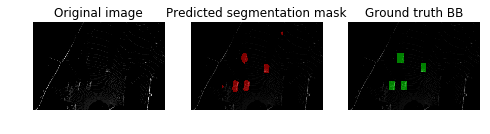

(320, 480, 1)


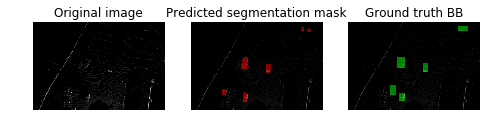

(320, 480, 1)


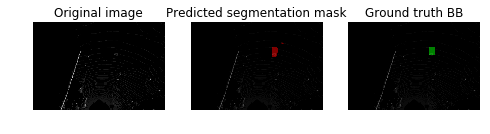

(320, 480, 1)


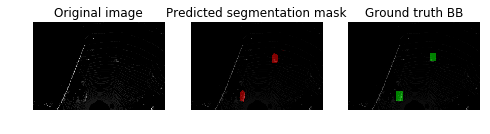

(320, 480, 1)


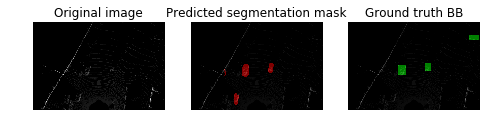

(320, 480, 1)


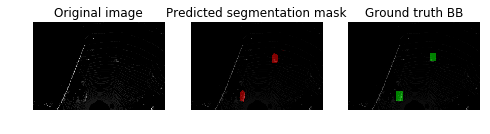

(320, 480, 1)


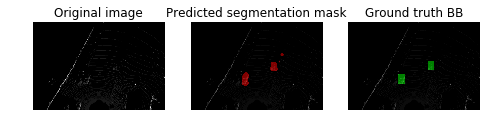

(320, 480, 1)


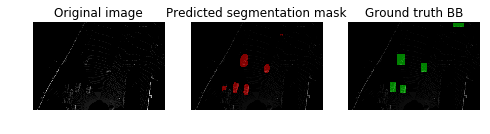

(320, 480, 1)


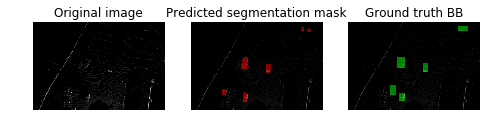

(320, 480, 1)


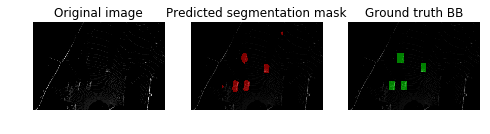

In [56]:
### Test on last frames of data
testing=generate_test_batch(df_vehicles,batch_size = 50)
batch_img,batch_mask = next(testing)
pred_all= model.predict(batch_img)
np.shape(pred_all)

for i in range(10):
    
    im = np.array(batch_img[i],dtype=np.uint8)
    im_mask = np.array(255*batch_mask[i],dtype=np.uint8)
    im_pred = np.array(255*pred_all[i],dtype=np.uint8)
    
    rgb_mask_pred = cv2.cvtColor(im_pred,cv2.COLOR_GRAY2RGB)
    rgb_mask_pred[:,:,1:3] = 0*rgb_mask_pred[:,:,1:2]
    rgb_mask_true= cv2.cvtColor(im_mask,cv2.COLOR_GRAY2RGB)
    rgb_mask_true[:,:,0] = 0*rgb_mask_true[:,:,0]
    rgb_mask_true[:,:,2] = 0*rgb_mask_true[:,:,2]
    
    img_pred = cv2.addWeighted(rgb_mask_pred,0.5,im,0.5,0)
    img_true = cv2.addWeighted(rgb_mask_true,0.5,im,0.5,0)
    print(im_pred.shape)
    plt.figure(figsize=(8,8))
    plt.subplot(1,3,1)
    plt.imshow(im)
    plt.title('Original image')
    plt.axis('off')
    plt.subplot(1,3,2)
    plt.imshow(img_pred)
    plt.title('Predicted segmentation mask')
    plt.axis('off')
    plt.subplot(1,3,3)
    plt.imshow(img_true)
    plt.title('Ground truth BB')
    plt.axis('off')
    plt.show()


In [57]:
#### Function for drawing bounding boxes, taken from Ryan's code on Udacity

def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        if ((np.max(nonzeroy)-np.min(nonzeroy)>14) & (np.max(nonzerox)-np.min(nonzerox)>14)):
            bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
            # Draw the box on the image       
            cv2.rectangle(img, bbox[0], bbox[1], (0,0,255),2)
    # Return the image
    return img

def test_new_img(img):
    img = cv2.resize(img,(img_cols, img_rows))
    img = np.reshape(img,(1,img_rows, img_cols,3))
    pred = model.predict(img)
    return pred,img[0]

def get_BB_new_img(img):
    # Take in RGB image
    pred,img = test_new_img(img)
    img  = np.array(img,dtype= np.uint8)
    img_pred = np.array(255*pred[0],dtype=np.uint8)
    heatmap = im_pred[:,:,0]
    labels = label(heatmap)
    draw_img = draw_labeled_bboxes(np.copy(img), labels)
    return draw_img

In [58]:
# ### Test on new image
# index=random.randint(1300)
# pathtest=test_objs['File_Path'][index]

# test_img = cv2.imread(pathtest)
# test_img = cv2.cvtColor(test_img,cv2.COLOR_BGR2RGB)

# draw_img = get_BB_new_img(im)


In [59]:
from scipy.ndimage.measurements import label

# test_img = 'test_images/test1.jpg'
# im = cv2.imread(test_img)
# im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
path1='/Users/simin/Desktop/didi-udacity-2017-master/data/seg4/top_image/top_image4_00372.png'
path2='/Users/simin/Desktop/didi-udacity-2017-master/data/test/top_image_00608.png'
path3='/Users/simin/Desktop/didi-udacity-2017-master/data/processed_didi/lidar_top_img/1490991819240274000.png'
# img=image.load_img(path1, target_size=(300,300))
# img=image.img_to_array(img)
test_img=imread(path1)

#draw_img = get_BB_new_img(im)


pred,im = test_new_img(test_img)
im  = np.array(im,dtype= np.uint8)
im_pred = np.array(255*pred[0],dtype=np.uint8)
rgb_mask_pred = cv2.cvtColor(im_pred,cv2.COLOR_GRAY2RGB)
rgb_mask_pred[:,:,1:3] = 0*rgb_mask_pred[:,:,1:2]



img_pred = cv2.addWeighted(rgb_mask_pred,0.55,im,1,0)



#heatmap = im_pred[:,:,0]

#labels = label(heatmap)
# Draw bounding boxes on a copy of the image
#draw_img = draw_labeled_bboxes(np.copy(im), labels)
# Display the image
#img_pred = im
#im_pred[:,:,]

draw_img = get_BB_new_img(im)


# diff = end_time - start_time
# diff

FileNotFoundError: [Errno 2] No such file or directory: '/Users/simin/Desktop/didi-udacity-2017-master/data/seg4/top_image/top_image4_00372.png'

In [ ]:
plt.imshow(im)
plt.axis('off')

In [ ]:
plt.imshow(draw_img)
plt.title('predict_result')
plt.axis('off')

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.imshow(im)
plt.title('Original')
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(img_pred)
plt.title('Segmentation')
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(draw_img)
plt.title('Bounding Box')
plt.axis('off');


In [ ]:
#### EXTRA STUFF THAT I DIDNT USE. 

In [ ]:
plt.imshow(im_pred[:,:,0])



In [ ]:

heatmap = im_pred[:,:,0]

labels = label(heatmap)
# Draw bounding boxes on a copy of the image
draw_img = draw_labeled_bboxes(np.copy(im), labels)
# Display the image
plt.imshow(draw_img)
plt.axis('off');

In [ ]:
plt.imshow(labels[0],cmap='gray')

In [ ]:
np.unique(labels[0])

In [ ]:
car_label = 1

blob_non0 = (car_label == labels[0])

img_0 = np.copy(heatmap)*0
img_0[blob_non0] = 255

In [ ]:
plt.imshow(blob_non0)
img_cny = cv2.Canny(img_0,128,255)
plt.imshow(img_cny,cmap='gray')